<p style="font-size:28px;font-weight:bold;">Module 4 - Multi-class/Multi-output</p>
One relevant feature of our given dataset is the independence of two different potential outputs:
<ul>
    <li>Pump Type</li>
    <li>Pump State</li>
</ul>

Because of this, a multi-class/multi-output classifier may be more relevant. Lets see how these classifier perform compared to the standalone multi-class classifier. </br></br>Everything leading up to the scoring is identical to the Multiclass problem, with only the import of the labels changing

In [1]:
import librosa
import numpy as np
import os
import matplotlib.pyplot as plt

In [2]:
LFCC = np.load("2D_LFCC.npy");
MFCC = np.load("2D_MFCC.npy");
LPC = np.load("2D_LPC.npy");
labels = np.load("Labels_MCMO.npy").astype(int);

In [3]:
label_defs = [["Pump 1", "Pump 2", "Pump 3", "Pump 4"], ["Start", "Run", "Stop", ""]];

In [4]:
import random
trainInds = random.sample(range(len(labels)),round(len(labels)*0.9));
testInds = [item for item in random.sample(range(len(labels)),round(len(labels))) if item not in trainInds];
LFCC_train = LFCC[trainInds];
LFCC_test = LFCC[testInds];
MFCC_train = MFCC[trainInds];
MFCC_test = MFCC[testInds];
LPC_train = LPC[trainInds];
LPC_test = LPC[testInds];
Y_test = labels[testInds];
Y_train = labels[trainInds];

<p style="font-size:20px;font-weight:bold;">KNeareset Neighbor Classifier</p>

In [5]:
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()

SciKit-Learn scoring metrics are incapable of directly taking the multi-class/multi-output data for scoring. To get around this, we need to treat each output as a separate problem. By specifying a single index for the second dimension of the label data, we can see how the classifiers perform

In [6]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import f1_score
y_train_knn_pred_LFCC = cross_val_predict(knn_clf, LFCC_train, Y_train, cv=3)
y_train_knn_pred_MFCC = cross_val_predict(knn_clf, MFCC_train, Y_train, cv=3)
y_train_knn_pred_LPC = cross_val_predict(knn_clf, LPC_train, Y_train, cv=3)
print(f"LFCC Pump Type KNN F1 Score: {f1_score(Y_train[:,0], y_train_knn_pred_LFCC[:,0], average="macro")}");
print(f"MFCC Pump Type KNN F1 Score: {f1_score(Y_train[:,0], y_train_knn_pred_MFCC[:,0], average="macro")}");
print(f"LPC  Pump Type KNN F1 Score: {f1_score(Y_train[:,0], y_train_knn_pred_LPC[:,0], average="macro")}");
print(f"{"-"*20}");
print(f"LFCC Run Type KNN F1 Score: {f1_score(Y_train[:,1], y_train_knn_pred_LFCC[:,1], average="macro")}");
print(f"MFCC Run Type KNN F1 Score: {f1_score(Y_train[:,1], y_train_knn_pred_MFCC[:,1], average="macro")}");
print(f"LPC  Run Type KNN F1 Score: {f1_score(Y_train[:,1], y_train_knn_pred_LPC[:,1], average="macro")}");

LFCC Pump Type KNN F1 Score: 1.0
MFCC Pump Type KNN F1 Score: 1.0
LPC  Pump Type KNN F1 Score: 0.9988087521302946
--------------------
LFCC Run Type KNN F1 Score: 0.9987740085301061
MFCC Run Type KNN F1 Score: 1.0
LPC  Run Type KNN F1 Score: 0.9963594687200477


Similar things can be done for the Confusion Matrix 

In [7]:
from sklearn.metrics import confusion_matrix

print("LFCC Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_knn_pred_LFCC[:,0]))
print("\n\nMFCC Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_knn_pred_MFCC[:,0]))
print("\n\nLPC  Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_knn_pred_LPC[:,0]))
print(f"{"-"*20}");
print("\n\nLFCC Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_knn_pred_LFCC[:,1]))
print("\n\nMFCC Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_knn_pred_MFCC[:,1]))
print("\n\nLPC  Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_knn_pred_LPC[:,1]))

LFCC Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 141   0   0]
 [  0   0 414   0]
 [  0   0   0 136]]


MFCC Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 141   0   0]
 [  0   0 414   0]
 [  0   0   0 136]]


LPC  Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 140   1   0]
 [  0   0 414   0]
 [  0   0   0 136]]
--------------------


LFCC Run Type Confusion Matrix:
[[277   1   0]
 [  0 266   0]
 [  0   0 282]]


MFCC Run Type Confusion Matrix:
[[278   0   0]
 [  0 266   0]
 [  0   0 282]]


LPC  Run Type Confusion Matrix:
[[277   1   0]
 [  1 265   0]
 [  1   0 281]]


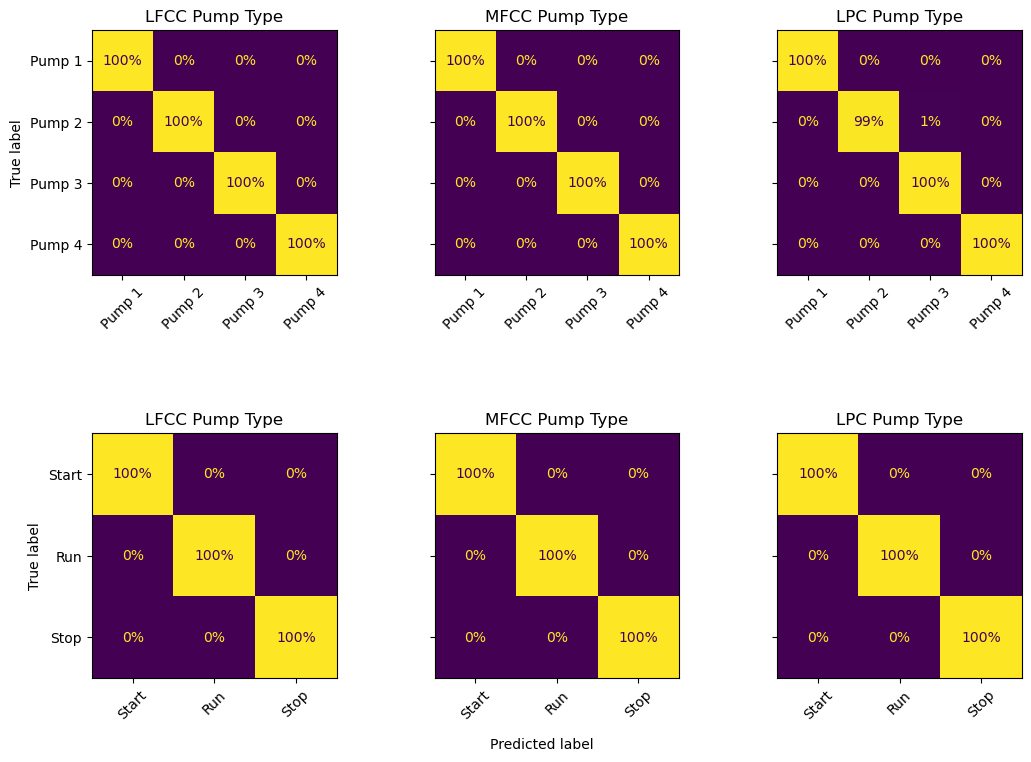

In [8]:
from sklearn.metrics import ConfusionMatrixDisplay
f, axes = plt.subplots(2, 3, figsize=(12, 10), sharey='row')

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_knn_pred_LFCC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][0], colorbar=False)
axes[0][0].set_title("LFCC Pump Type");
axes[0][0].set_xlabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_knn_pred_MFCC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][1], colorbar=False)
axes[0][1].set_title("MFCC Pump Type");
axes[0][1].set_xlabel("");
axes[0][1].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_knn_pred_LPC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][2], colorbar=False)
axes[0][2].set_title("LPC Pump Type");
axes[0][2].set_xlabel("");
axes[0][2].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_knn_pred_LFCC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][0], colorbar=False)
axes[1][0].set_title("LFCC Pump Type");
axes[1][0].set_xlabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_knn_pred_MFCC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][1], colorbar=False)
axes[1][1].set_title("MFCC Pump Type");
axes[1][1].set_xlabel("");
axes[1][1].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_knn_pred_LPC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][2], colorbar=False)
axes[1][2].set_title("LPC Pump Type");
axes[1][2].set_xlabel("");
axes[1][2].set_ylabel("");

f.text(0.5, 0.1, 'Predicted label', ha='center')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()


Similar to the multiclass problem, in order to calculate ROC curves, we need to binarize our data. One difference here is that we need two different binarizers, one for each output. 

In [9]:
from sklearn.preprocessing import LabelBinarizer

label_binarizer = LabelBinarizer().fit(Y_train[:,0])
y_onehot_test_pump = label_binarizer.transform(Y_test[:,0])

label_binarizer = LabelBinarizer().fit(Y_train[:,1])
y_onehot_test_run = label_binarizer.transform(Y_test[:,1])

Due to the number of ROC curves we need to plot, the following function wraps all necessary calculations into a modular call. This will allow us to plot the ROC curves for any classifier or output with one call

In [10]:
from itertools import cycle
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_auc_score, roc_curve

def plotROCs(classifier, train_X, train_Y, test_X, test_Y, output, onehot, axis, labels, title):
    # By passing in the classifier, we can generalize this function
    classifier.fit(train_X,train_Y)
    y_scores = classifier.predict_proba(test_X);

    # All following references to the y_scores specify an index based on [output], which has been passed in.
    # This allows us to generalize which of the multi-output sets we want to score.
    
    fpr, tpr, roc_auc = dict(), dict(), dict()
    # Compute micro-average ROC curve and ROC area
    fpr["micro"], tpr["micro"], _ = roc_curve(onehot.ravel(), y_scores[output].ravel())
    
    for i in range(len(labels)):
        fpr[i], tpr[i], _ = roc_curve(onehot[:, i], y_scores[output][:, i])
    
    fpr_grid = np.linspace(0.0, 1.0, 1000)
    
    # Interpolate all ROC curves at these points
    mean_tpr = np.zeros_like(fpr_grid)
    
    for i in range(len(labels)):
        mean_tpr += np.interp(fpr_grid, fpr[i], tpr[i])  # linear interpolation
    
    # Average it and compute AUC
    mean_tpr /= len(labels)
    
    fpr["macro"] = fpr_grid
    tpr["macro"] = mean_tpr

    # The axis on which we want to plot the data is passed in, so we can easily do things like subplots
    
    axis.plot(
        fpr["micro"],
        tpr["micro"],
        label=f"micro-average ROC curve (AUC = {roc_auc_score(test_Y[:,output], y_scores[output], multi_class="ovr", average="micro",):.2f})",
        color="deeppink",
        linestyle=":",
        linewidth=4,
    )
    
    axis.plot(
        fpr["macro"],
        tpr["macro"],
        label=f"macro-average ROC curve (AUC = {roc_auc_score(test_Y[:,output], y_scores[output], multi_class="ovr", average="macro",):.2f})",
        color="navy",
        linestyle=":",
        linewidth=4,
    )
    
    colors = cycle(["aqua", "darkorange", "cornflowerblue"])
    for class_id, color in zip(range(len(labels)), colors):
        RocCurveDisplay.from_predictions(
            onehot[:, class_id],
            y_scores[output][:, class_id],
            name=f"ROC curve for {labels[class_id]}",
            curve_kwargs=dict(color=color),
            ax=axis,
            plot_chance_level=(class_id == 2),
            despine=True,
        )
    
    _ = axis.set(
        xlabel="False Positive Rate",
        ylabel="True Positive Rate",
        title=title,
    )

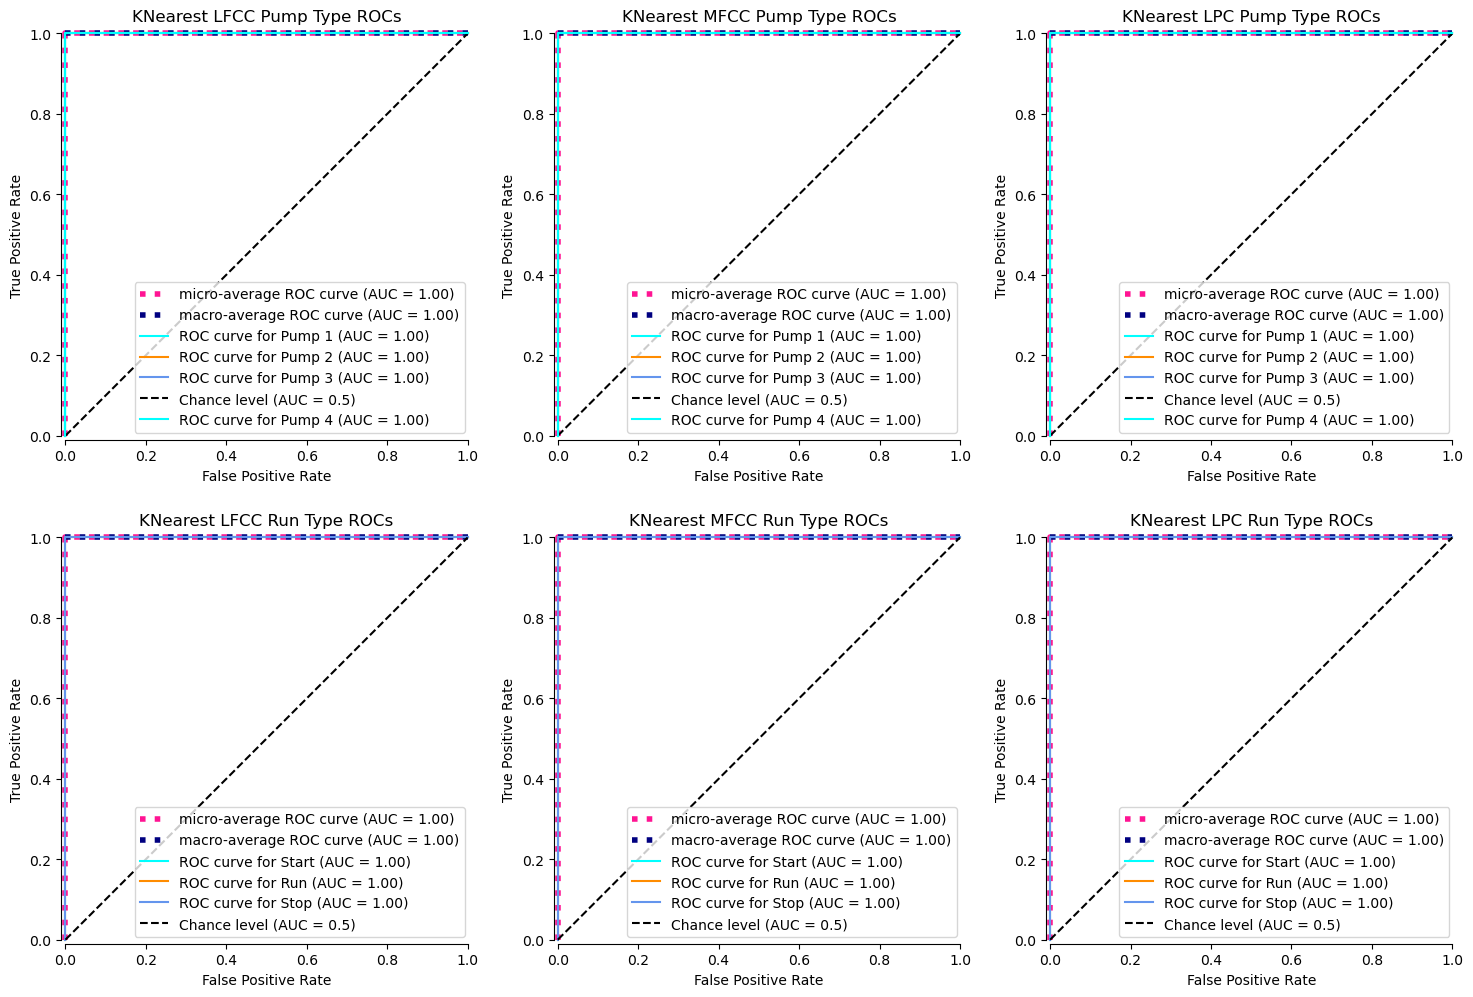

In [11]:
fig, ax = plt.subplots(2,3,figsize=(18, 12))
plotROCs(knn_clf, LFCC_train, Y_train, LFCC_test, Y_test, 0, y_onehot_test_pump, ax[0][0], label_defs[0][:], "KNearest LFCC Pump Type ROCs");
plotROCs(knn_clf, MFCC_train, Y_train, MFCC_test, Y_test, 0, y_onehot_test_pump, ax[0][1], label_defs[0][:], "KNearest MFCC Pump Type ROCs");
plotROCs(knn_clf, LPC_train, Y_train, LPC_test, Y_test, 0, y_onehot_test_pump, ax[0][2], label_defs[0][:], "KNearest LPC Pump Type ROCs");

plotROCs(knn_clf, LFCC_train, Y_train, LFCC_test, Y_test, 1, y_onehot_test_run, ax[1][0], label_defs[1][0:3], "KNearest LFCC Run Type ROCs");
plotROCs(knn_clf, MFCC_train, Y_train, MFCC_test, Y_test, 1, y_onehot_test_run, ax[1][1], label_defs[1][0:3], "KNearest MFCC Run Type ROCs");
plotROCs(knn_clf, LPC_train, Y_train, LPC_test, Y_test, 1, y_onehot_test_run, ax[1][2], label_defs[1][0:3], "KNearest LPC Run Type ROCs");

<p style="font-size: 28px; font-weight: bold;">Random Forest Testing</p>
At this point, we repeat the entire process above for the RandomForest classifier for comparison

In [12]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
y_train_rf_pred_LFCC = cross_val_predict(forest_clf, LFCC_train, Y_train, cv=3)
y_train_rf_pred_MFCC = cross_val_predict(forest_clf, MFCC_train, Y_train, cv=3)
y_train_rf_pred_LPC = cross_val_predict(forest_clf, LPC_train, Y_train, cv=3)
print(f"LFCC Pump Type RF F1 Score: {f1_score(Y_train[:,0], y_train_rf_pred_LFCC[:,0], average="macro")}");
print(f"MFCC Pump Type RF F1 Score: {f1_score(Y_train[:,0], y_train_rf_pred_MFCC[:,0], average="macro")}");
print(f"LPC  Pump Type RF F1 Score: {f1_score(Y_train[:,0], y_train_rf_pred_LPC[:,0], average="macro")}");
print(f"{"-"*20}");
print(f"LFCC Run Type RF F1 Score: {f1_score(Y_train[:,1], y_train_rf_pred_LFCC[:,1], average="macro")}");
print(f"MFCC Run Type RF F1 Score: {f1_score(Y_train[:,1], y_train_rf_pred_MFCC[:,1], average="macro")}");
print(f"LPC  Run Type RF F1 Score: {f1_score(Y_train[:,1], y_train_rf_pred_LPC[:,1], average="macro")}");

LFCC Pump Type RF F1 Score: 1.0
MFCC Pump Type RF F1 Score: 1.0
LPC  Pump Type RF F1 Score: 0.9988087521302946
--------------------
LFCC Run Type RF F1 Score: 0.9987740085301061
MFCC Run Type RF F1 Score: 1.0
LPC  Run Type RF F1 Score: 0.9988094896430914


In [13]:
print("LFCC Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_rf_pred_LFCC[:,0]))
print("\n\nMFCC Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_rf_pred_MFCC[:,0]))
print("\n\nLPC  Pump Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,0], y_train_rf_pred_LPC[:,0]))
print(f"{"-"*20}");
print("LFCC Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_rf_pred_LFCC[:,1]))
print("\n\nMFCC Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_rf_pred_MFCC[:,1]))
print("\n\nLPC  Run Type Confusion Matrix:");
print(confusion_matrix(Y_train[:,1], y_train_rf_pred_LPC[:,1]))

LFCC Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 141   0   0]
 [  0   0 414   0]
 [  0   0   0 136]]


MFCC Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 141   0   0]
 [  0   0 414   0]
 [  0   0   0 136]]


LPC  Pump Type Confusion Matrix:
[[135   0   0   0]
 [  0 140   1   0]
 [  0   0 414   0]
 [  0   0   0 136]]
--------------------
LFCC Run Type Confusion Matrix:
[[277   1   0]
 [  0 266   0]
 [  0   0 282]]


MFCC Run Type Confusion Matrix:
[[278   0   0]
 [  0 266   0]
 [  0   0 282]]


LPC  Run Type Confusion Matrix:
[[278   0   0]
 [  0 266   0]
 [  1   0 281]]


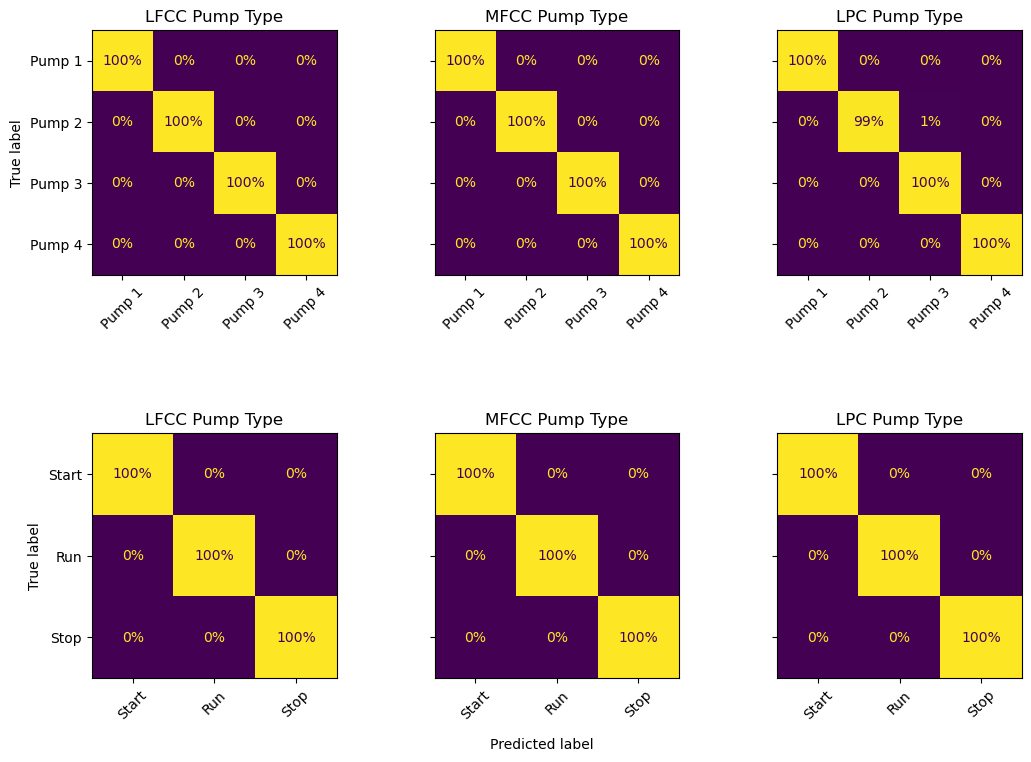

In [14]:
f, axes = plt.subplots(2, 3, figsize=(12, 10), sharey='row')

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_rf_pred_LFCC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][0], colorbar=False)
axes[0][0].set_title("LFCC Pump Type");
axes[0][0].set_xlabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_rf_pred_MFCC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][1], colorbar=False)
axes[0][1].set_title("MFCC Pump Type");
axes[0][1].set_xlabel("");
axes[0][1].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,0], y_train_rf_pred_LPC[:,0], normalize="true", values_format=".0%", display_labels=label_defs[0][:], xticks_rotation=45, ax=axes[0][2], colorbar=False)
axes[0][2].set_title("LPC Pump Type");
axes[0][2].set_xlabel("");
axes[0][2].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_rf_pred_LFCC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][0], colorbar=False)
axes[1][0].set_title("LFCC Pump Type");
axes[1][0].set_xlabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_rf_pred_MFCC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][1], colorbar=False)
axes[1][1].set_title("MFCC Pump Type");
axes[1][1].set_xlabel("");
axes[1][1].set_ylabel("");

ConfusionMatrixDisplay.from_predictions(Y_train[:,1], y_train_rf_pred_LPC[:,1], normalize="true", values_format=".0%", display_labels=label_defs[1][0:3], xticks_rotation=45, ax=axes[1][2], colorbar=False)
axes[1][2].set_title("LPC Pump Type");
axes[1][2].set_xlabel("");
axes[1][2].set_ylabel("");

f.text(0.5, 0.1, 'Predicted label', ha='center')
plt.subplots_adjust(wspace=0.40, hspace=0.1)
plt.show()

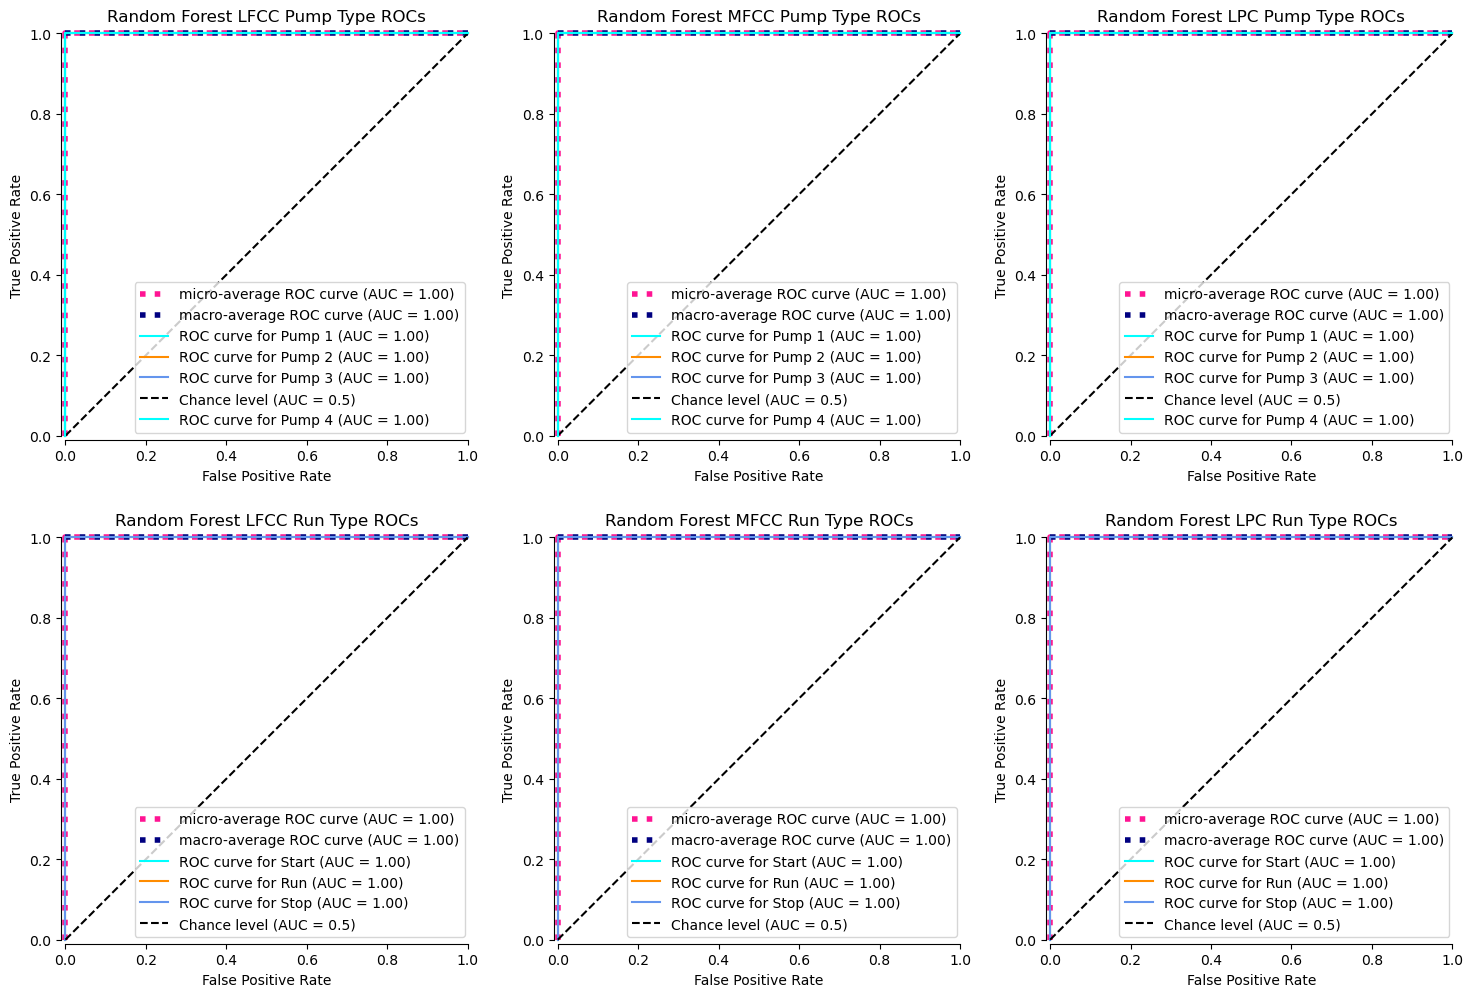

In [15]:
fig, ax = plt.subplots(2,3,figsize=(18, 12))
plotROCs(forest_clf, LFCC_train, Y_train, LFCC_test, Y_test, 0, y_onehot_test_pump, ax[0][0], label_defs[0][:], "Random Forest LFCC Pump Type ROCs");
plotROCs(forest_clf, MFCC_train, Y_train, MFCC_test, Y_test, 0, y_onehot_test_pump, ax[0][1], label_defs[0][:], "Random Forest MFCC Pump Type ROCs");
plotROCs(forest_clf, LPC_train, Y_train, LPC_test, Y_test, 0, y_onehot_test_pump, ax[0][2], label_defs[0][:], "Random Forest LPC Pump Type ROCs");

plotROCs(forest_clf, LFCC_train, Y_train, LFCC_test, Y_test, 1, y_onehot_test_run, ax[1][0], label_defs[1][0:3], "Random Forest LFCC Run Type ROCs");
plotROCs(forest_clf, MFCC_train, Y_train, MFCC_test, Y_test, 1, y_onehot_test_run, ax[1][1], label_defs[1][0:3], "Random Forest MFCC Run Type ROCs");
plotROCs(forest_clf, LPC_train, Y_train, LPC_test, Y_test, 1, y_onehot_test_run, ax[1][2], label_defs[1][0:3], "Random Forest LPC Run Type ROCs");

<p style="font-size: 30px; font-weight: bold;">Leave One Out Testing</p>
One interesting thought with the multi-class/multi-output dataset is that we have separated identification of pump from pump state. This allows the additional questions:
<ul>
    <li>Can we identify pump state for an untrained model of pump?</li>
    <li>If we can, does this ability depend on what pumps we train with?</li>
    <li>What pump will the classifier think our untrained data belongs to?</li>
</ul>

To test this, we will train the classifiers on the dataset with all instances of one specific pump removed. We will start with MFCC Data.</br></br>We can use list comprehension to select all data where the pump label is not 0:

In [16]:
loo_MFCC_train = MFCC_train[Y_train[:,0]!=0]
loo_Y_train = Y_train[Y_train[:,0]!=0]

In [17]:
forest_clf.fit(loo_MFCC_train,loo_Y_train)
preds = forest_clf.predict(MFCC_test);

To see how our classifier performed, let's test all of the excluded data against the model and see what outputs we get. We can use the label definitions to make this more human readable

In [18]:
to_check = Y_test[:,0]==0;
print(f"Predicted\tActual:");
for i in range(len(preds[to_check])):
    print(f"{label_defs[0][(preds[to_check])[i][0]]} {label_defs[1][(preds[to_check])[i][1]]},  \t{label_defs[0][(Y_test[to_check])[i][0]]} {label_defs[1][(Y_test[to_check])[i][1]]}");

wrong = np.count_nonzero(np.abs((preds[to_check])[:,1] - (Y_test[to_check])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check]))):.2f}% Accuracy for Run Type")

## We can exclude the run case to see if performance differs by using a logical and between pump 1 and not run to select our data
to_check_norun = np.logical_and(Y_test[:,0]==0, Y_test[:,1]!=1);

wrong = np.count_nonzero(np.abs((preds[to_check_norun])[:,1] - (Y_test[to_check_norun])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check_norun]))):.2f}% Accuracy for Run Type besides Run")

Predicted	Actual:
Pump 3 Stop,  	Pump 1 Run
Pump 4 Stop,  	Pump 1 Run
Pump 4 Stop,  	Pump 1 Run
Pump 2 Stop,  	Pump 1 Stop
Pump 4 Stop,  	Pump 1 Run
Pump 2 Stop,  	Pump 1 Stop
Pump 4 Stop,  	Pump 1 Run
Pump 3 Stop,  	Pump 1 Start
Pump 4 Stop,  	Pump 1 Run
Pump 4 Stop,  	Pump 1 Run
Pump 3 Stop,  	Pump 1 Start
Pump 2 Stop,  	Pump 1 Stop
Pump 4 Start,  	Pump 1 Start
Pump 2 Stop,  	Pump 1 Stop
Pump 4 Start,  	Pump 1 Start

40.00% Accuracy for Run Type

75.00% Accuracy for Run Type besides Run


Try running the whole script a few times. Because of the randomness of our test and training datasets, the results can change. In particular, if your test set has many instances of the Run state, the classifier may perform poorly. When there are few Run states, it may perform much better. </br></br>What if we leave out Pump 2 instead?

In [19]:
loo_MFCC_train = MFCC_train[Y_train[:,0]!=1]
loo_Y_train = Y_train[Y_train[:,0]!=1]

In [20]:
forest_clf.fit(loo_MFCC_train,loo_Y_train)
preds = forest_clf.predict(MFCC_test);

In [21]:
to_check = Y_test[:,0]==1;
print(f"Predicted\tActual:");
for i in range(len(preds[to_check])):
    print(f"{label_defs[0][(preds[to_check])[i][0]]} {label_defs[1][(preds[to_check])[i][1]]},  \t{label_defs[0][(Y_test[to_check])[i][0]]} {label_defs[1][(Y_test[to_check])[i][1]]}");

wrong = np.count_nonzero(np.abs((preds[to_check])[:,1] - (Y_test[to_check])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check]))):.2f}% Accuracy for Run Type")

to_check_norun = np.logical_and(Y_test[:,0]==1, Y_test[:,1]!=1);

wrong = np.count_nonzero(np.abs((preds[to_check_norun])[:,1] - (Y_test[to_check_norun])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check_norun]))):.2f}% Accuracy for Run Type besides Run")

Predicted	Actual:
Pump 3 Stop,  	Pump 2 Stop
Pump 3 Start,  	Pump 2 Start
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Start,  	Pump 2 Start
Pump 3 Start,  	Pump 2 Start
Pump 3 Stop,  	Pump 2 Stop
Pump 3 Stop,  	Pump 2 Stop
Pump 3 Start,  	Pump 2 Start

100.00% Accuracy for Run Type

100.00% Accuracy for Run Type besides Run


Based on the results above, the case where Pump 2 is excluded from the dataset appears to produce much better results.</br></br>What about for LFCC data instead of MFCC Data?

In [22]:
loo_LFCC_train = LFCC_train[Y_train[:,0]!=0]
loo_Y_train = Y_train[Y_train[:,0]!=0]

In [23]:
forest_clf.fit(loo_LFCC_train,loo_Y_train)
preds = forest_clf.predict(LFCC_test);

In [24]:
to_check = Y_test[:,0]==0;
print(f"Predicted\tActual:");
for i in range(len(preds[to_check])):
    print(f"{label_defs[0][(preds[to_check])[i][0]]} {label_defs[1][(preds[to_check])[i][1]]},  \t{label_defs[0][(Y_test[to_check])[i][0]]} {label_defs[1][(Y_test[to_check])[i][1]]}");

wrong = np.count_nonzero(np.abs((preds[to_check])[:,1] - (Y_test[to_check])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check]))):.2f}% Accuracy for Run Type")

to_check_norun = np.logical_and(Y_test[:,0]==0, Y_test[:,1]!=1);

wrong = np.count_nonzero(np.abs((preds[to_check_norun])[:,1] - (Y_test[to_check_norun])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check_norun]))):.2f}% Accuracy for Run Type besides Run")

Predicted	Actual:
Pump 3 Stop,  	Pump 1 Run
Pump 4 Stop,  	Pump 1 Run
Pump 4 Stop,  	Pump 1 Run
Pump 3 Stop,  	Pump 1 Stop
Pump 3 Stop,  	Pump 1 Run
Pump 2 Stop,  	Pump 1 Stop
Pump 3 Stop,  	Pump 1 Run
Pump 2 Start,  	Pump 1 Start
Pump 3 Stop,  	Pump 1 Run
Pump 3 Stop,  	Pump 1 Run
Pump 2 Start,  	Pump 1 Start
Pump 3 Stop,  	Pump 1 Stop
Pump 2 Start,  	Pump 1 Start
Pump 2 Stop,  	Pump 1 Stop
Pump 2 Start,  	Pump 1 Start

53.33% Accuracy for Run Type

100.00% Accuracy for Run Type besides Run


In [25]:
loo_LFCC_train = LFCC_train[Y_train[:,0]!=1]
loo_Y_train = Y_train[Y_train[:,0]!=1]

In [26]:
forest_clf.fit(loo_LFCC_train,loo_Y_train)
preds = forest_clf.predict(LFCC_test);

In [27]:
to_check = Y_test[:,0]==1;
print(f"Predicted\tActual:");
for i in range(len(preds[to_check])):
    print(f"{label_defs[0][(preds[to_check])[i][0]]} {label_defs[1][(preds[to_check])[i][1]]},  \t{label_defs[0][(Y_test[to_check])[i][0]]} {label_defs[1][(Y_test[to_check])[i][1]]}");

wrong = np.count_nonzero(np.abs((preds[to_check])[:,1] - (Y_test[to_check])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check]))):.2f}% Accuracy for Run Type")

to_check_norun = np.logical_and(Y_test[:,0]==1, Y_test[:,1]!=1);

wrong = np.count_nonzero(np.abs((preds[to_check_norun])[:,1] - (Y_test[to_check_norun])[:,1]));
print(f"\n{100*(1-(wrong/len(preds[to_check_norun]))):.2f}% Accuracy for Run Type besides Run")

Predicted	Actual:
Pump 1 Stop,  	Pump 2 Stop
Pump 3 Start,  	Pump 2 Start
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Run,  	Pump 2 Run
Pump 3 Start,  	Pump 2 Start
Pump 3 Start,  	Pump 2 Start
Pump 1 Stop,  	Pump 2 Stop
Pump 1 Stop,  	Pump 2 Stop
Pump 3 Start,  	Pump 2 Start

100.00% Accuracy for Run Type

100.00% Accuracy for Run Type besides Run


Based on the results above, it appears that we can somewhat accurately identify run state of pumps for which we have no training data. There are a few takeaways from the above results:
<ul>
    <li>LFCC Appears to perform slightly better than MFCC data</li>
    <li>Pump 2 data appears to be easier to identify when excluded than Pump 1</li>
    <li>The run state appears to be the hardest to accurately classify, and performance on the other states is better</li>
</ul>